#### Sources

- [Wisconsin 2022 Wards](https://data-ltsb.opendata.arcgis.com/datasets/LTSB::wisconsin-redistricting-wards-2022/explore) 
- [RDH Wisconsin 2020 Census Block Boundaries](https://redistrictingdatahub.org/dataset/wisconsin-block-boundaries-2020/)
- [RDH 2022 Wisconsin PBER](https://redistrictingdatahub.org/wp-content/uploads/2023/12/readme_wi_gen_22_ru.txt)
- [RDH Github 2022 Wisc Processing Code](https://github.com/nonpartisan-redistricting-datahub/pber_collection/blob/main/WI/2022/wi_pber_v0.ipynb)

In [1]:
import pandas as pd
import geopandas as gp
import maup
import os

In [2]:
#Read in 2020 WI census blocks
wi_blocks_raw = gp.read_file("./raw-from-source/wi_b_2020_bound/wi_b_2020_bound.shp").to_crs(4326)
wi_blocks = wi_blocks_raw[['GEOID20', 'geometry']]

In [3]:
#Read in 2022 WI Wards
wiwards22_raw = gp.read_file("./raw-from-source/Wisconsin_Redistricting_Wards.geojson").to_crs(4326)
wi_wards = wiwards22_raw[['OBJECTID', 'WARDID','geometry']]

In [4]:
#Read in RDH 2022 WI Wards
rdh_wiwards_raw = gp.read_file("./raw-from-source/LF_rfs/WI_Statewide_WardsOct14_2022/Statewide_WardsOct14_2022.shp").to_crs(4326)
rdh_wards = rdh_wiwards_raw[['WARD_FIPS', 'WARDID','geometry']]

In [5]:
print(len(wi_wards), len(rdh_wards))


7032 6971


In [6]:
rdh_wards.head()

,WARD_FIPS,WARDID,geometry
0,55001002750001,0001,"POLYGON ((-89.82790 43.96682, -89.82784 43.964..."
1,55001002750002,0002,"POLYGON ((-89.80944 43.95336, -89.81006 43.953..."
2,55001002750003,0003,"POLYGON ((-89.79756 43.95224, -89.80423 43.952..."
3,55001002750004,0004,"POLYGON ((-89.81786 43.96681, -89.81780 43.965..."
4,55001002750005,0005,"POLYGON ((-89.80944 43.95336, -89.80942 43.952..."


In [7]:
wi_blocks['RDH_WARDS'] = maup.assign(wi_blocks, rdh_wards)

C:\Users\aditi\anaconda3\lib\site-packages\maup\intersections.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df = df[df.area > area_cutoff].reset_index(drop=True)
C:\Users\aditi\anaconda3\lib\site-packages\maup\intersections.py:52: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
C:\Users\aditi\anaconda3\lib\site-packages\maup\assign.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources, targets, area_cutoff=0).area)
C:\Users\aditi\anaconda3\lib\site-packages\geopandas\geodataframe.py

In [8]:
wi_blocks.head()

,GEOID20,geometry,RDH_WARDS
0,550999704001040,"POLYGON ((-90.61666 45.70397, -90.61659 45.704...",4649.0
1,550999706002032,"POLYGON ((-90.52452 45.63381, -90.52446 45.634...",4657.0
2,550999701003089,"POLYGON ((-90.16762 45.78595, -90.16724 45.786...",4651.0
3,550999701003105,"POLYGON ((-90.21012 45.75799, -90.20988 45.758...",4682.0
4,550999707001024,"POLYGON ((-90.29082 45.54624, -90.29082 45.546...",4677.0


In [9]:
wi_blocks['RDH_WARDS'].nunique()

6891

In [17]:
wi_blocks['RDH_WARDS'].isnull().sum()

164

In [11]:
#check these in q gis to make sure they are water
null_wards = wi_blocks[wi_blocks['RDH_WARDS'].isnull()]
null_wards.to_file("./null_wards.geojson")

<AxesSubplot:>

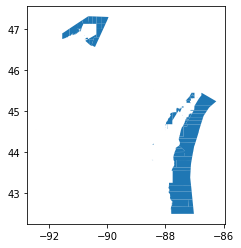

In [12]:
null_wards.plot()

In [13]:
# Create BAF
baf = wi_blocks[['GEOID20', 'RDH_WARDS']]
baf.columns = ['GEOID20', 'WARD']

In [14]:
baf['WARD'] = baf['WARD'].fillna('No Assignment')

<ipython-input-14-0056a972c527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baf['WARD'] = baf['WARD'].fillna('No Assignment')


In [15]:
baf.head()

,GEOID20,WARD
0,550999704001040,4649.0
1,550999706002032,4657.0
2,550999701003089,4651.0
3,550999701003105,4682.0
4,550999707001024,4677.0


In [16]:
if not os.path.exists("./WI_2022_BAF"):
    os.mkdir("./WI_2022_BAF/")
baf.to_csv('./WI_2022_BAF/WI22_WARDS_BAF.csv', index=False)